# Project 1
***By: Sam Daitzman and Mary Fung***

In [1]:
%matplotlib inline
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'
from modsim import *

### Question
Looking at data for the Yellowstone reintroduced wolf population, what were the chances that the Yellowstone Wolf Project would fail?

### Background


### Approach
We'll model the initial explosion in wolf population at Yellowstone using a logistic or proportional population growth model. When we have a model that matches the initial growth and slowing of growth, we'll simulate the initial introduction and population changes a large number of times. In some of these simulations, the wolf population will die off before reaching a carrying/significant population. We'll keep track of the percentage of simulations in which this happens. This will represent the percentage chance of failure according to our model.

*OPTIONAL:* We could do a parameter sweep of this simulation to figure out if Yellowstone could have achieved likely-similar outcomes with fewer introduced wolves, or increased reliability by introducing more wolves.

In [2]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

from pandas import read_html

In [3]:
def plot_results(timeseries, title):
    """Plot the estimates and the model.
    
    census: TimeSeries of population estimates
    un: TimeSeries of population estimates
    timeseries: TimeSeries of simulation results
    title: string
    """
    plot(timeseries, color='gray', label='model')
    
    decorate(xlabel='Year', 
             ylabel='World population (billion)',
             title=title)

In [4]:
filename = 'data/World_population_estimates.html'
tables = read_html(filename, header=0, index_col=0, decimal='M')
table2 = tables[2]
table2.columns = ['census', 'prb', 'un', 'maddison', 
                  'hyde', 'tanton', 'biraben', 'mj', 
                  'thomlinson', 'durand', 'clark']

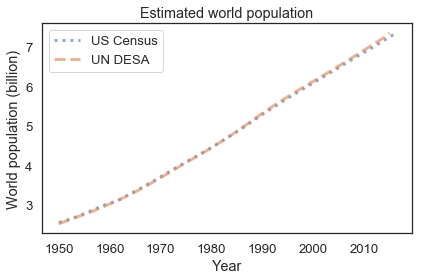

In [5]:
un = table2.un / 1e9
census = table2.census / 1e9
plot(census, ':', label='US Census')
plot(un, '--', label='UN DESA')
    
decorate(xlabel='Year', 
             ylabel='World population (billion)',
             title='Estimated world population')

In [6]:
t_0 = get_first_label(census)
t_end = get_last_label(census)
p_0 = get_first_value(census)

2.557628654

In [7]:
system = System(t_0=t_0, 
                t_end=t_end,
                p_0=p_0,
                alpha=0.025,
                beta=-0.0018)

,values
t_0,1950.000000
t_end,2016.000000
p_0,2.557629
alpha,0.025000
beta,-0.001800


In [8]:
def run_simulation(system, update_func):
    """Simulate the system using any update function.
    
    system: System object
    update_func: function that computes the population next year
    
    returns: TimeSeries
    """
    results = TimeSeries()
    results[system.t_0] = system.p_0
    
    for t in linrange(system.t_0, system.t_end):
        results[t+1] = update_func(results[t], t, system)
        
    return results

In [9]:
def update_func_quad(pop, t, system):
    """Update population based on a quadratic model.
    
    pop: current population in billions
    t: what year it is
    system: system object with model parameters
    """
    net_growth = system.alpha * pop + system.beta * pop**2
    return pop + net_growth

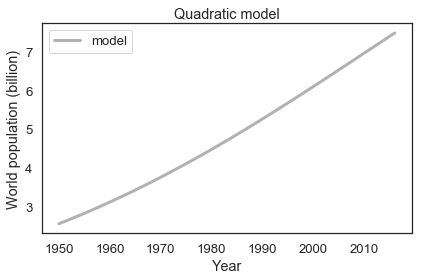

In [10]:
results = run_simulation(system, update_func_quad)
plot_results(results, 'Quadratic model')

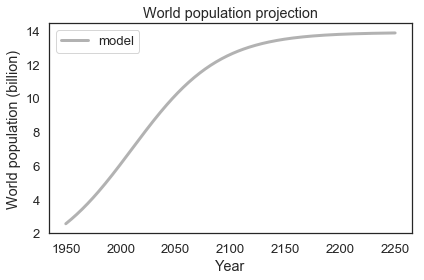

In [11]:
system.t_end = 2250
results = run_simulation(system, update_func_quad)
plot_results(results, 'World population projection')